# DATA EXPLORATION

<ipython-input-2-01cab1b0cd80>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='industry', palette='viridis', data=train)


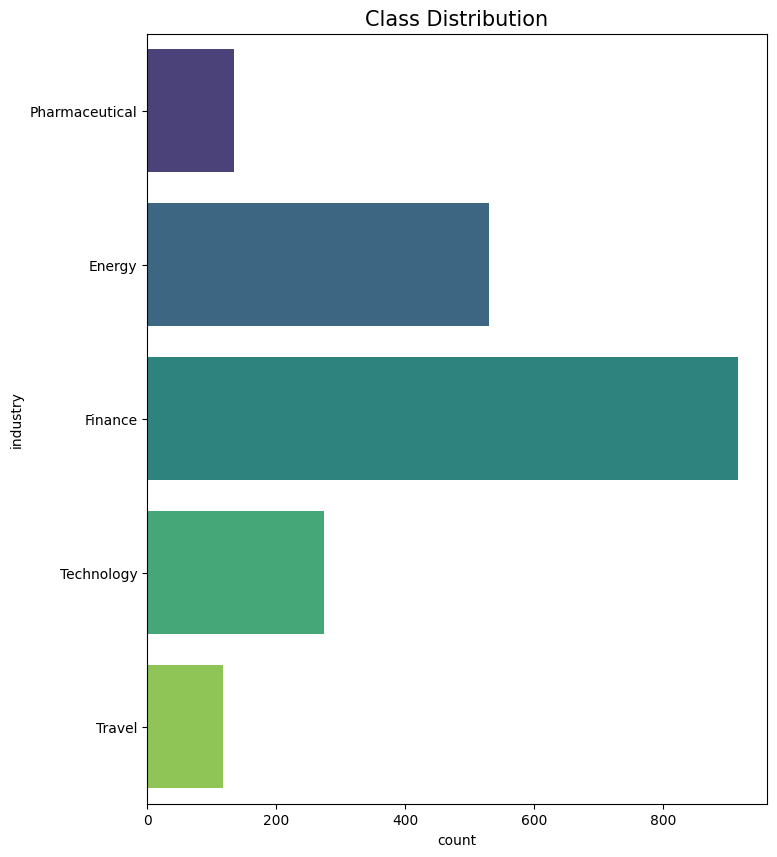

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('/content/Train - Email Classification.csv')
plt.figure(figsize=(8, 10))
sns.countplot(y='industry', palette='viridis', data=train)
plt.title('Class Distribution', size=15)
plt.show()


# NAIVE BASEIAN MODEL


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


[ 'net cash flow provided operating activity $ 704.4 million 2016 increased $ 154.7 million 2015 due primarily ( 1 ) improved operating performance ( 2 ) lower supplier payment 2016 compared 2015 , partially offset ( 1 ) impact excess tax benefit stock plan , primarily due increased stock price , ( 2 ) increase account receivable due increased sale , primarily united state . ' 'net cash flow provided operating activity $ 549.7 million 2015 decreased $ 472.6 million 2014 due primarily ( 1 ) $ 750.0 million upfront payment received medtronic litigation settlement agreement , ( 2 ) higher bonus payout 2015 associated 2014 performance . ' 'these decrease partially offset ( 1 ) income tax payment $ 224.5 million made 2014 related medtronic settlement , ( 2 ) improved operating performance 2015 , ( 3 ) $ 50.0 million charitable contribution made 2014 edward lifesciences foundation . ' 'net cash used investing activity $ 211.7 million 2016 consisted primarily capital expenditure $ 176.1 milli

<ipython-input-3-0893271f07cc>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='industry', palette='viridis', data=test)


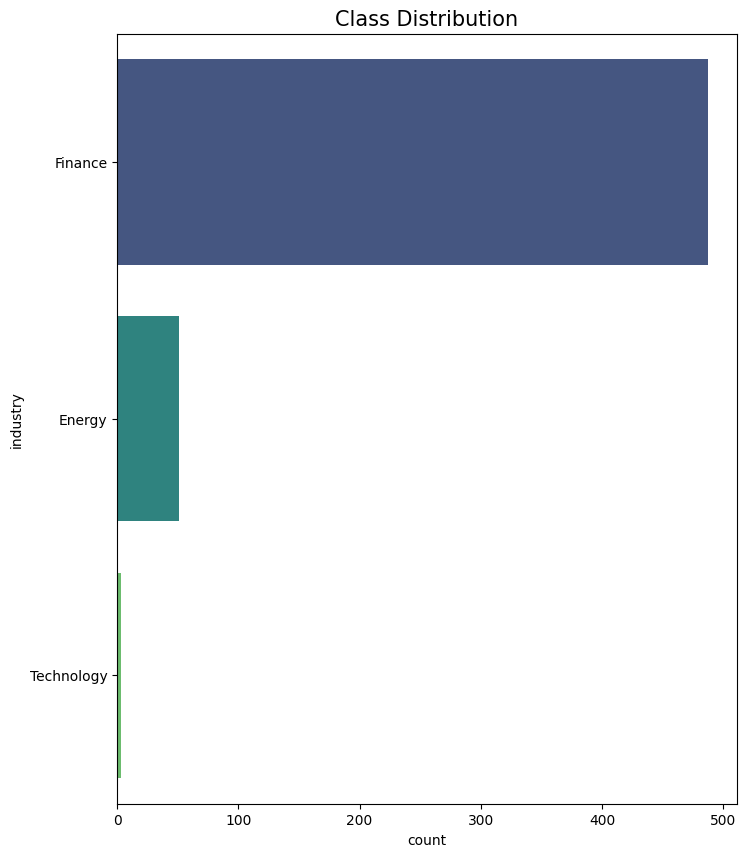

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

train=pd.read_csv('/content/Train - Email Classification.csv')
test=pd.read_csv('/content/Test - Email Classification.csv')

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



def preprocess_text(text):
    text=text.lower()
    tokens=word_tokenize(text)
    stop_words=set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

train['proc_pre_text']=train['pre_text'].apply(preprocess_text)
train['proc_post_text']=train['post_text'].apply(preprocess_text)
train['new_col']=train['proc_pre_text']+train['proc_post_text']

print(train['new_col'].head().loc[0])



from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report,f1_score
from sklearn.model_selection import train_test_split

X=train['new_col']
Y=train['industry']

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

test['proc_pre_text']=test['pre_text'].apply(preprocess_text)
test['proc_post_text']=test['post_text'].apply(preprocess_text)
test['new_col']=test['proc_pre_text']+test['proc_post_text']

X_test_tfidf = tfidf_vectorizer.transform(test['new_col'])

X_train,X_test,Y_train,Y_test=train_test_split(X_tfidf,Y,test_size=0.25,random_state=42)

naive_bayes_classifier = MultinomialNB()
model=naive_bayes_classifier.fit(X_train,Y_train)

y_pred = model.predict(X_test)
print(y_pred)

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(Y_test,y_pred,average=None)
print("F1 score:",f1)

y_pred_test = model.predict(X_test_tfidf)
print(y_pred_test)

test['industry'] = y_pred_test

df_plot = pd.DataFrame(y_pred_test)
plt.figure(figsize=(8, 10))
sns.countplot(y='industry', palette='viridis', data=test)
plt.title('Class Distribution', size=15)
plt.show()


# SUPPORT VECTOR MACHINE

0.9898580121703854
F1 score: [0.9921875  0.99365751 0.94915254 0.98550725 1.        ]
['Technology' 'Energy' 'Finance' 'Finance' 'Finance' 'Finance' 'Finance'
 'Finance' 'Finance' 'Energy' 'Finance' 'Finance' 'Finance' 'Technology'
 'Technology' 'Energy' 'Finance' 'Finance' 'Energy' 'Technology'
 'Technology' 'Finance' 'Finance' 'Finance' 'Finance' 'Energy' 'Energy'
 'Finance' 'Technology' 'Finance' 'Pharmaceutical' 'Finance' 'Finance'
 'Finance' 'Finance' 'Finance' 'Finance' 'Finance' 'Finance' 'Finance'
 'Finance' 'Finance' 'Finance' 'Finance' 'Finance' 'Finance' 'Finance'
 'Finance' 'Energy' 'Energy' 'Energy' 'Finance' 'Pharmaceutical' 'Finance'
 'Finance' 'Finance' 'Finance' 'Energy' 'Finance' 'Finance' 'Finance'
 'Finance' 'Finance' 'Finance' 'Energy' 'Finance' 'Energy' 'Energy'
 'Technology' 'Finance' 'Finance' 'Finance' 'Finance' 'Technology'
 'Energy' 'Finance' 'Finance' 'Pharmaceutical' 'Technology' 'Technology'
 'Finance' 'Finance' 'Technology' 'Technology' 'Energy' 'Finance'

<ipython-input-4-6d16f84a717f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='svm_industry', palette='viridis', data=test)


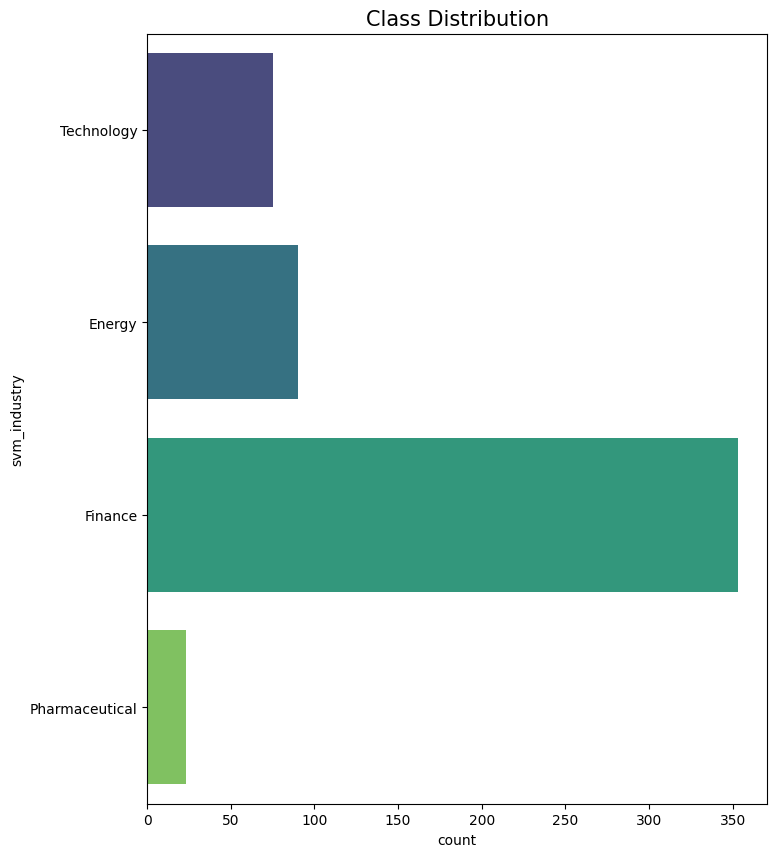

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score

clf=svm.SVC(kernel='linear')
model1=clf.fit(X_train,Y_train)
y_pred1=model1.predict(X_test)

acc1=accuracy_score(Y_test,y_pred1)
print(acc1)
f1 = f1_score(Y_test,y_pred1,average=None)
print("F1 score:",f1)

y_pred2=model1.predict(X_test_tfidf)
print(y_pred2)

test['svm_industry'] = y_pred2

plt.figure(figsize=(8, 10))
sns.countplot(y='svm_industry', palette='viridis', data=test)
plt.title('Class Distribution', size=15)
plt.show()



In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

train=pd.read_csv('/content/Train - Email Classification.csv')
test=pd.read_csv('/content/Test - Email Classification.csv')

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    text=text.lower()
    tokens=word_tokenize(text)
    stop_words=set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

train['proc_pre_text']=train['pre_text'].apply(preprocess_text)
train['proc_post_text']=train['post_text'].apply(preprocess_text)
train['new_col']=train['proc_pre_text']+train['proc_post_text']

print(train['new_col'].head().loc[0])

#NAIVE BAYES
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

X=train['new_col']
Y=train['industry']

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

test['proc_pre_text']=test['pre_text'].apply(preprocess_text)
test['proc_post_text']=test['post_text'].apply(preprocess_text)
test['new_col']=test['proc_pre_text']+test['proc_post_text']

X_test_tfidf = tfidf_vectorizer.transform(test['new_col'])

X_train,X_test,Y_train,Y_test=train_test_split(X_tfidf,Y,test_size=0.25,random_state=42)

naive_bayes_classifier = MultinomialNB()
model=naive_bayes_classifier.fit(X_train,Y_train)

y_pred = model.predict(X_test)
print(y_pred)

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy NB:", accuracy)

y_pred_test = model.predict(X_test_tfidf)
print(y_pred_test)

#SVM
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score

clf=svm.SVC(kernel='linear')
model1=clf.fit(X_train,Y_train)
y_pred1=model1.predict(X_test)

acc1=accuracy_score(Y_test,y_pred1)
print(acc1)

y_pred2=model1.predict(X_test_tfidf)
print(y_pred2)





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[ 'net cash flow provided operating activity $ 704.4 million 2016 increased $ 154.7 million 2015 due primarily ( 1 ) improved operating performance ( 2 ) lower supplier payment 2016 compared 2015 , partially offset ( 1 ) impact excess tax benefit stock plan , primarily due increased stock price , ( 2 ) increase account receivable due increased sale , primarily united state . ' 'net cash flow provided operating activity $ 549.7 million 2015 decreased $ 472.6 million 2014 due primarily ( 1 ) $ 750.0 million upfront payment received medtronic litigation settlement agreement , ( 2 ) higher bonus payout 2015 associated 2014 performance . ' 'these decrease partially offset ( 1 ) income tax payment $ 224.5 million made 2014 related medtronic settlement , ( 2 ) improved operating performance 2015 , ( 3 ) $ 50.0 million charitable contribution made 2014 edward lifesciences foundation . ' 'net cash used investing activity $ 211.7 million 2016 consisted primarily capital expenditure $ 176.1 milli

In [ ]:
import imaplib
import email
from datetime import datetime, timedelta

def extract_body(payload):
    if isinstance(payload, str):
        return payload
    elif isinstance(payload, bytes):
        return payload.decode('utf-8')
    else:
        return None

def mail_extract():
    mail = imaplib.IMAP4_SSL('imap.gmail.com')
    mail.login('ishani.deshmukh@cumminscollege.in', 'July@2023')
    mail.select('inbox')
    today = datetime.today().strftime('%d-%b-%Y')
    result, data = mail.search(None, '(UNSEEN)', '(SINCE "' + today + '")')

    emails_data = []

    if result == 'OK':
        mail_ids = data[0].split()
        for mail_id in mail_ids:
            result, message_data = mail.fetch(mail_id, '(RFC822)')
            raw_email = message_data[0][1]
            msg = email.message_from_bytes(raw_email)
            email_subject = msg['subject']
            email_from = msg['from']

            # Extracting the email body
            if msg.is_multipart():
                for part in msg.walk():
                    content_type = part.get_content_type()
                    content_disposition = str(part.get("Content-Disposition"))
                    if "attachment" not in content_disposition:
                        body = part.get_payload(decode=True)
                        body = extract_body(body)
                        if body:
                            emails_data.append({'From': email_from, 'Subject': email_subject, 'Body': body})
            else:
                body = msg.get_payload(decode=True)
                body = extract_body(body)
                if body:
                    emails_data.append({'From': email_from, 'Subject': email_subject, 'Body': body})
    else:
        print("No unread emails found.")

    mail.close()
    mail.logout()

    # Extract only the email bodies into a list
    email_bodies = [email_data['Body'] for email_data in emails_data]

    return email_bodies

# Usage example
email_bodies = mail_extract()
print(email_bodies)


['Tech email\r\n', '<div dir="auto">Tech email\xa0</div>\r\n', '\r\n', '<div dir="ltr"><br></div>\r\n', 'Please lend me a loan\r\n', '<div dir="ltr">Please lend me a loan\xa0</div>\r\n']


In [ ]:
import imaplib
import email
from datetime import datetime, timedelta
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
import smtplib
from sklearn.feature_extraction.text import TfidfVectorizer

# Define Gmail credentials
gmail_user = "ishani.deshmukh@cumminscollege.in"
gmail_password = "*****"

# Define the label dictionary
'''label_dict = {
    0: 'truce0475@gmail.com',  # Technical
    1: 'truce0476@gmail.com',  # Finance
    2: 'truce0477@gmail.com',  # Energy
    3: 'truce0479@gmail.com',  # Pharmaceuticals
    4: 'sanjanainapakolla@gmail.com'  # Travel
}'''

# Define your send_email function
def send_email(to, subject, body):
    try:
        msg = MIMEMultipart()
        msg['From'] = gmail_user
        msg['To'] = to
        msg['Subject'] = subject
        msg.attach(MIMEText(body, 'plain'))

        server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
        server.ehlo()
        server.login(gmail_user, gmail_password)
        server.sendmail(gmail_user, to, msg.as_string())
        server.close()
        print("Email sent successfully!")
    except smtplib.SMTPAuthenticationError:
        print("Authentication error: Please check your Gmail username and password.")
    except smtplib.SMTPException as e:
        print(f"SMTP error: {e}")
    except Exception as e:
        print(f"Error occurred: {e}")

# Define your mail_extract function
def mail_extract():
    try:
        mail = imaplib.IMAP4_SSL('imap.gmail.com')
        mail.login(gmail_user, gmail_password)
        mail.select('inbox')
        today = (datetime.today() - timedelta(days=1)).strftime('%d-%b-%Y')
        result, data = mail.search(None, '(UNSEEN)', '(SINCE "' + today + '")')

        emails_data = []
        if result == 'OK':
            mail_ids = data[0].split()
            for mail_id in mail_ids:
                result, message_data = mail.fetch(mail_id, '(RFC822)')
                raw_email = message_data[0][1]
                msg = email.message_from_bytes(raw_email)
                email_subject = msg['subject']
                email_from = msg['from']

                # Extracting the email body
                if msg.is_multipart():
                    for part in msg.walk():
                        content_type = part.get_content_type()
                        content_disposition = str(part.get("Content-Disposition"))
                        if "attachment" not in content_disposition:
                            body = part.get_payload(decode=True)
                            body = extract_body(body)
                            if body:
                                emails_data.append({'From': email_from, 'Subject': email_subject, 'Body': body})
                else:
                    body = msg.get_payload(decode=True)
                    body = extract_body(body)
                    if body:
                        emails_data.append({'From': email_from, 'Subject': email_subject, 'Body': body})
        else:
            print("No unread emails found.")

        mail.close()
        mail.logout()

        # Extract email bodies
        #email_bodies = [email_data['Body'] for email_data in emails_data]

        return email_bodies
    except Exception as e:
        print("Error during email extraction:", e)
        return []

def preprocess_text(text):
    text=text.lower()
    tokens=word_tokenize(text)
    stop_words=set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)


# Define route function
def route(email_bodies, tfidf_vectorizer, model):
    try:
        for body in email_bodies:
            email_text = preprocess_text(body)

            if email_text:
                X_tfidf = tfidf_vectorizer.transform([email_text])
                pred = model.predict(X_tfidf)[0]

                print("Predicted Label:", pred)

                if pred == 'technical':
                    to_email = 'truce0475@gmail.com'
                    print(pred,"Email sent to:", to_email)
                elif pred == 'finance':
                    to_email = 'truce0476@gmail.com'
                    print(pred,"Email sent to:", to_email)
                elif pred == 'energy':
                    to_email = 'truce0477@gmail.com'
                    print(pred,"Email sent to:", to_email)
                elif pred == 'pharmaceutical':
                    to_email = 'truce0479@gmail.com'
                    print(pred,"Email sent to:", to_email)
                elif pred == 'travel':
                    to_email = 'sanjanainapakolla@gmail.com'
                    print(pred,"Email sent to:", to_email)
                else:
                  print("Label not found:", pred)


            else:
                print("No email body available for processing.")
    except Exception as e:
        print("Error during routing emails:", e)

# Call mail_extract function to get email bodies
email_bodies = mail_extract()

# Call route function with email bodies, TF-IDF vectorizer, and model1
route(email_bodies, tfidf_vectorizer, model1)


# Assuming you have a trained TF-IDF vectorizer named tfidf_vectorizer
# Assuming you have a trained model named model1

# Call mail_extract function to get email bodies
email_bodies = mail_extract()

# Call route function with email bodies, TF-IDF vectorizer, and model1
route(email_bodies, tfidf_vectorizer, model1)


Predicted Label: Finance
Label not found: Finance
Predicted Label: Finance
Label not found: Finance
No email body available for processing.
Predicted Label: Finance
Label not found: Finance
Predicted Label: Finance
Label not found: Finance
Predicted Label: Finance
Label not found: Finance
Predicted Label: Finance
Label not found: Finance
Predicted Label: Finance
Label not found: Finance
No email body available for processing.
Predicted Label: Finance
Label not found: Finance
Predicted Label: Finance
Label not found: Finance
Predicted Label: Finance
Label not found: Finance


In [ ]:
import pandas as pd

# Given data
data = ['Technology', 'Energy', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Energy', 'Finance', 'Finance', 'Finance', 'Technology', 'Technology', 'Energy', 'Finance', 'Finance', 'Energy', 'Technology', 'Technology', 'Finance', 'Finance', 'Finance', 'Finance', 'Energy', 'Energy', 'Finance', 'Technology', 'Finance', 'Pharmaceutical', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Energy', 'Energy', 'Energy', 'Finance', 'Pharmaceutical', 'Finance', 'Finance', 'Finance', 'Finance', 'Energy', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Energy', 'Finance', 'Energy', 'Energy', 'Technology', 'Finance', 'Finance', 'Finance', 'Finance', 'Technology', 'Energy', 'Finance', 'Finance', 'Pharmaceutical', 'Technology', 'Technology', 'Finance', 'Finance', 'Technology', 'Technology', 'Energy', 'Finance', 'Technology', 'Energy', 'Finance', 'Energy', 'Finance', 'Finance', 'Technology', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Pharmaceutical', 'Finance', 'Energy', 'Finance', 'Finance', 'Energy', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Pharmaceutical', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Energy', 'Finance', 'Finance', 'Energy', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Energy', 'Energy', 'Finance', 'Pharmaceutical', 'Finance', 'Finance', 'Energy', 'Technology', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Technology', 'Finance', 'Technology', 'Finance', 'Finance', 'Finance', 'Finance', 'Energy', 'Finance', 'Finance', 'Finance', 'Finance', 'Technology', 'Technology', 'Pharmaceutical', 'Pharmaceutical', 'Energy', 'Finance', 'Finance', 'Technology', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Energy', 'Energy', 'Pharmaceutical', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Technology', 'Technology', 'Finance', 'Finance', 'Pharmaceutical', 'Energy', 'Technology', 'Technology', 'Finance', 'Finance', 'Finance', 'Finance', 'Energy', 'Finance', 'Finance', 'Technology', 'Finance', 'Technology', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Energy', 'Finance', 'Technology', 'Finance', 'Finance', 'Finance', 'Finance', 'Technology', 'Finance', 'Finance', 'Energy', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Energy', 'Finance', 'Energy', 'Finance', 'Finance', 'Pharmaceutical', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Technology', 'Finance', 'Finance', 'Technology', 'Finance', 'Energy', 'Finance', 'Finance', 'Energy', 'Finance', 'Finance', 'Technology', 'Energy', 'Energy', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Energy', 'Technology', 'Technology', 'Energy', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Energy', 'Finance', 'Finance', 'Technology', 'Finance', 'Finance', 'Technology', 'Finance', 'Finance', 'Finance', 'Energy', 'Finance', 'Technology', 'Technology', 'Energy', 'Finance', 'Finance', 'Energy', 'Finance', 'Finance', 'Finance', 'Technology', 'Finance', 'Energy', 'Finance', 'Finance', 'Finance', 'Energy', 'Finance', 'Finance', 'Finance', 'Energy', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Energy', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Energy', 'Finance', 'Finance', 'Finance', 'Finance', 'Energy', 'Finance', 'Finance', 'Technology', 'Finance', 'Technology', 'Finance', 'Finance', 'Finance', 'Technology', 'Technology', 'Finance', 'Finance', 'Energy', 'Energy', 'Finance', 'Finance', 'Finance', 'Pharmaceutical', 'Energy', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Energy', 'Finance', 'Finance', 'Pharmaceutical', 'Finance', 'Finance', 'Finance', 'Technology', 'Finance', 'Pharmaceutical', 'Technology', 'Finance', 'Finance', 'Finance', 'Pharmaceutical', 'Finance', 'Finance', 'Finance', 'Finance', 'Energy', 'Energy', 'Technology', 'Finance', 'Finance', 'Technology', 'Technology', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Technology', 'Finance', 'Technology', 'Finance', 'Finance', 'Technology', 'Energy', 'Finance', 'Finance', 'Energy', 'Finance', 'Energy', 'Finance', 'Finance', 'Technology', 'Finance', 'Finance', 'Pharmaceutical', 'Energy', 'Technology', 'Finance', 'Energy', 'Energy', 'Finance', 'Finance', 'Finance', 'Energy', 'Technology', 'Energy', 'Technology', 'Finance', 'Technology', 'Finance', 'Energy', 'Finance', 'Energy', 'Finance', 'Finance', 'Technology', 'Technology', 'Finance', 'Pharmaceutical', 'Energy', 'Finance', 'Finance', 'Finance', 'Technology', 'Pharmaceutical', 'Finance', 'Finance', 'Technology', 'Finance', 'Finance', 'Finance', 'Finance', 'Energy', 'Finance', 'Technology', 'Finance', 'Finance', 'Technology', 'Technology', 'Technology', 'Finance', 'Finance', 'Finance', 'Energy', 'Finance', 'Energy', 'Finance', 'Finance', 'Finance', 'Finance', 'Technology', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Technology', 'Finance', 'Finance', 'Finance', 'Finance', 'Energy', 'Finance', 'Energy', 'Energy', 'Energy', 'Energy', 'Finance', 'Technology', 'Finance', 'Finance', 'Finance', 'Finance', 'Finance', 'Energy', 'Energy', 'Finance', 'Finance', 'Technology', 'Finance', 'Finance', 'Technology', 'Finance', 'Energy', 'Technology', 'Finance', 'Technology', 'Energy', 'Finance', 'Technology', 'Pharmaceutical', 'Energy', 'Finance', 'Finance', 'Finance', 'Energy', 'Finance', 'Finance', 'Energy', 'Energy', 'Finance', 'Energy', 'Finance', 'Finance', 'Finance', 'Finance', 'Technology', 'Finance', 'Pharmaceutical', 'Finance', 'Finance', 'Technology', 'Energy', 'Technology', 'Energy', 'Finance', 'Energy', 'Finance', 'Finance', 'Pharmaceutical', 'Finance', 'Energy', 'Pharmaceutical', 'Finance', 'Finance', 'Technology', 'Pharmaceutical', 'Energy', 'Energy', 'Finance', 'Finance', 'Finance', 'Finance']

# Create a DataFrame from the given data
df = pd.DataFrame(data, columns=['Data'])

# Save the DataFrame to an Excel file
df.to_excel('data.xlsx', index=False)
